In [1]:
# set up 
lunarc = 0
seed_data = 7
nbr_rounds = 5 

import os

print(os.getcwd())

# set the wd to the base folder for the project
os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
from sbi import utils as utils
import random

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/hodgkin_huxley


In [2]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

# this func. is used to read both the posteiro sames and the data samples 
def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

In [3]:
import torch 
from torch.distributions.multivariate_normal import MultivariateNormal

def fit_gaussian_dist(post_samples):

    mean = np.mean(post_samples, axis=0)
    cov = np.cov(post_samples, rowvar=0)

    return MultivariateNormal(loc=torch.from_numpy(mean).to(dtype=torch.float32),
                              covariance_matrix=torch.from_numpy(cov).to(dtype=torch.float32))


In [4]:
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1
seed_max = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

##  nbr samples = 10

In [5]:
nbr_params = 10
data_set = "snl"

In [6]:
import HodgkinHuxley
import functions as func

model = HodgkinHuxley.HodgkinHuxley(data_set, nbr_params)

 
 << defining template for one-compartment sPY cell >> 
 
 
<< sPY: passive, INa, IK, IM inserted >>
 
	Vector[0] 


In [7]:
t_vec = np.array(HodgkinHuxley.h.t_vec)

In [8]:
dt = t_vec[1] - t_vec[0]

In [9]:
dt

0.025

In [10]:
v_true, Iinj = model.simulator(model.log_theta_true, seed_data, True)

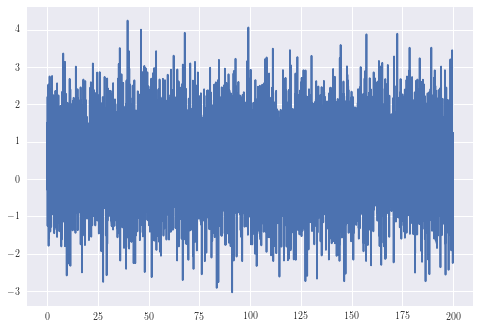

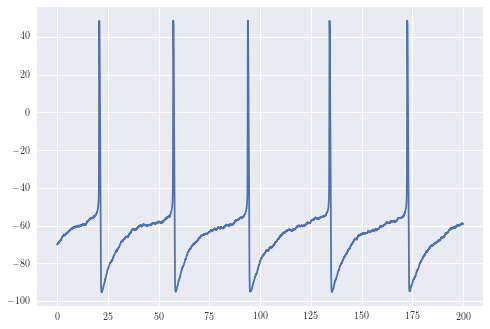

In [11]:
plt.figure()
plt.plot(t_vec, Iinj)

plt.figure()
plt.plot(t_vec, v_true)

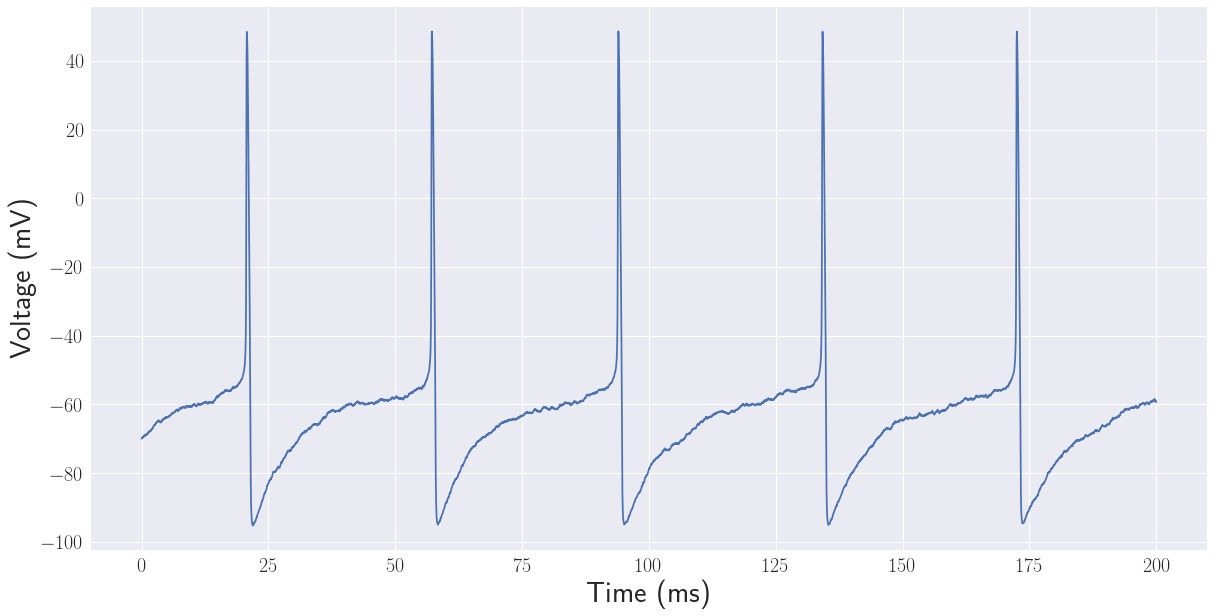

In [12]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(t_vec, v_true)
ax.set_ylabel("Voltage (mV) ", fontsize=30)
ax.set_xlabel("Time (ms)", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.savefig("./fig/data.pdf", bbox_inches='tight')

In [13]:
theta_true = torch.from_numpy(np.array(model.log_theta_true)).to(dtype=torch.float32)

In [14]:
prior_limits = []

for i in range(nbr_params):
    prior_limits.append([round(model.prior.base_dist.low[i].item(),1),
                         round(model.prior.base_dist.high[i].item(),1)])


In [15]:

if nbr_params == 12:
    labels = [r"log(gbar_Na)",
              r"log(gbar_K)",
              r"log(g_leak)",
              r"log(E_Na)",
              r"log(-E_K)",
              r"log(-E_leak)",
              r"log(gbar_M)",
              r"log(tau_max)",
              r"log(kappa_beta_n_1)",
              r"log(kappa_beta_n_2)",
              r"log(Vt)",
              r"log(sigma)"]
else:
    labels = [r"$\log(\bar{g}_{Na})$",
              r"$\log(\bar{g}_K)$",
              r"$\log(g_{leak})$",
              r"$\log(E_{Na})$",
              r"$\log(-E_K)$",
              r"$\log(-E_{leak})$",
              r"$\log(\bar{g}_M)$",
              r"$\log(\tau_{max})$",
              r"$\log(Vt)$",
             r"$\log(\sigma)$"]

In [16]:
nbr_rounds = 12
x_grid = [1,2,3,4,5,6,7,8,9,10]
x_grid_extended = [2,4,6,8,10,12,14,16,18,20]

### sbi 500 

In [17]:
nbr_samples = 200
job = str(data_set) + "_" + str(nbr_params) + "_" + str(nbr_samples)

In [18]:
job

'snl_10_200'

In [18]:
snpe_c_res = np.zeros((2, 1))
p = 'results/snpec_'  + '_' + job + '.txt'
snpe_c_res[:,0] = read_res_file(p)
print(snpe_c_res)

[[4.491148e+03]
 [9.400000e-02]]


In [19]:
snl_res = np.zeros((2, 1))
p = 'results/snl_'  + '_' + job + '.txt'
snl_res[:,0] = read_res_file(p)
print(snl_res)

[[29601.8307]
 [ 1197.324 ]]


In [20]:
snpla_res = np.zeros((2, 1))
p = 'results/snpla_'  + '_' + job + '.txt'
snpla_res[:,0] = read_res_file(p)
print(snpla_res)

[[7.5415927e+03]
 [9.1100000e-02]]


In [21]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(seed_max):
        p = 'data/post_samples_snpec_' + str(i+1) + '_' + job + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [22]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds): # should be nbr_rounds later
    snl_post_round_i = []
    for j in range(seed_max):
        p = 'data/post_samples_snl_' + str(i+1) + '_' + job + '.csv'
        snl_post_round_i.append(read_posterior_samples(p))
            
    snl_post.append(snl_post_round_i)

In [23]:
snpla_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds): # should be nbr_rounds later
    snpla_post_round_i = []
    for j in range(seed_max):
        p = 'data/post_samples_snpla_' + str(i+1) + '_' + job + '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))
            
    snpla_post.append(snpla_post_round_i)

In [24]:
log_prob_snpe_c = np.zeros((nbr_rounds,1))
log_prob_snl = np.zeros((nbr_rounds,1))
log_prob_snpla = np.zeros((nbr_rounds,1))

for i in range(nbr_rounds): 
    log_prob_snpe_c[i] = -fit_gaussian_dist(snpe_c_post[i][0]).log_prob(theta_true).item()

for i in range(nbr_rounds): 
    log_prob_snl[i] = -fit_gaussian_dist(snl_post[i][0]).log_prob(theta_true).item()

for i in range(nbr_rounds): 
    log_prob_snpla[i] = -fit_gaussian_dist(snpla_post[i][0]).log_prob(theta_true).item()


    
    

In [25]:
runtime_one_iter_snl = snl_res[0,0]/nbr_rounds/60
runtime_one_iter_snpe_c = snpe_c_res[0,0]/nbr_rounds/60
runtime_one_iter_snpla = snpla_res[0,0]/nbr_rounds/60

x_snl = []
x_snpe_c = []
x_snpla = []

x_snl.append(runtime_one_iter_snl)
x_snpe_c.append(runtime_one_iter_snpe_c)
x_snpla.append(runtime_one_iter_snpla)

for i in range(nbr_rounds-1):
    
    x_snl.append(x_snl[i] + runtime_one_iter_snl)
    x_snpe_c.append(x_snpe_c[i] + runtime_one_iter_snpe_c)
    x_snpla.append(x_snpla[i] + runtime_one_iter_snpla)
    


In [26]:
runtime_one_iter_snpla*9

94.26990874999998

In [27]:
runtime_one_iter_snl*9

370.02288375

findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


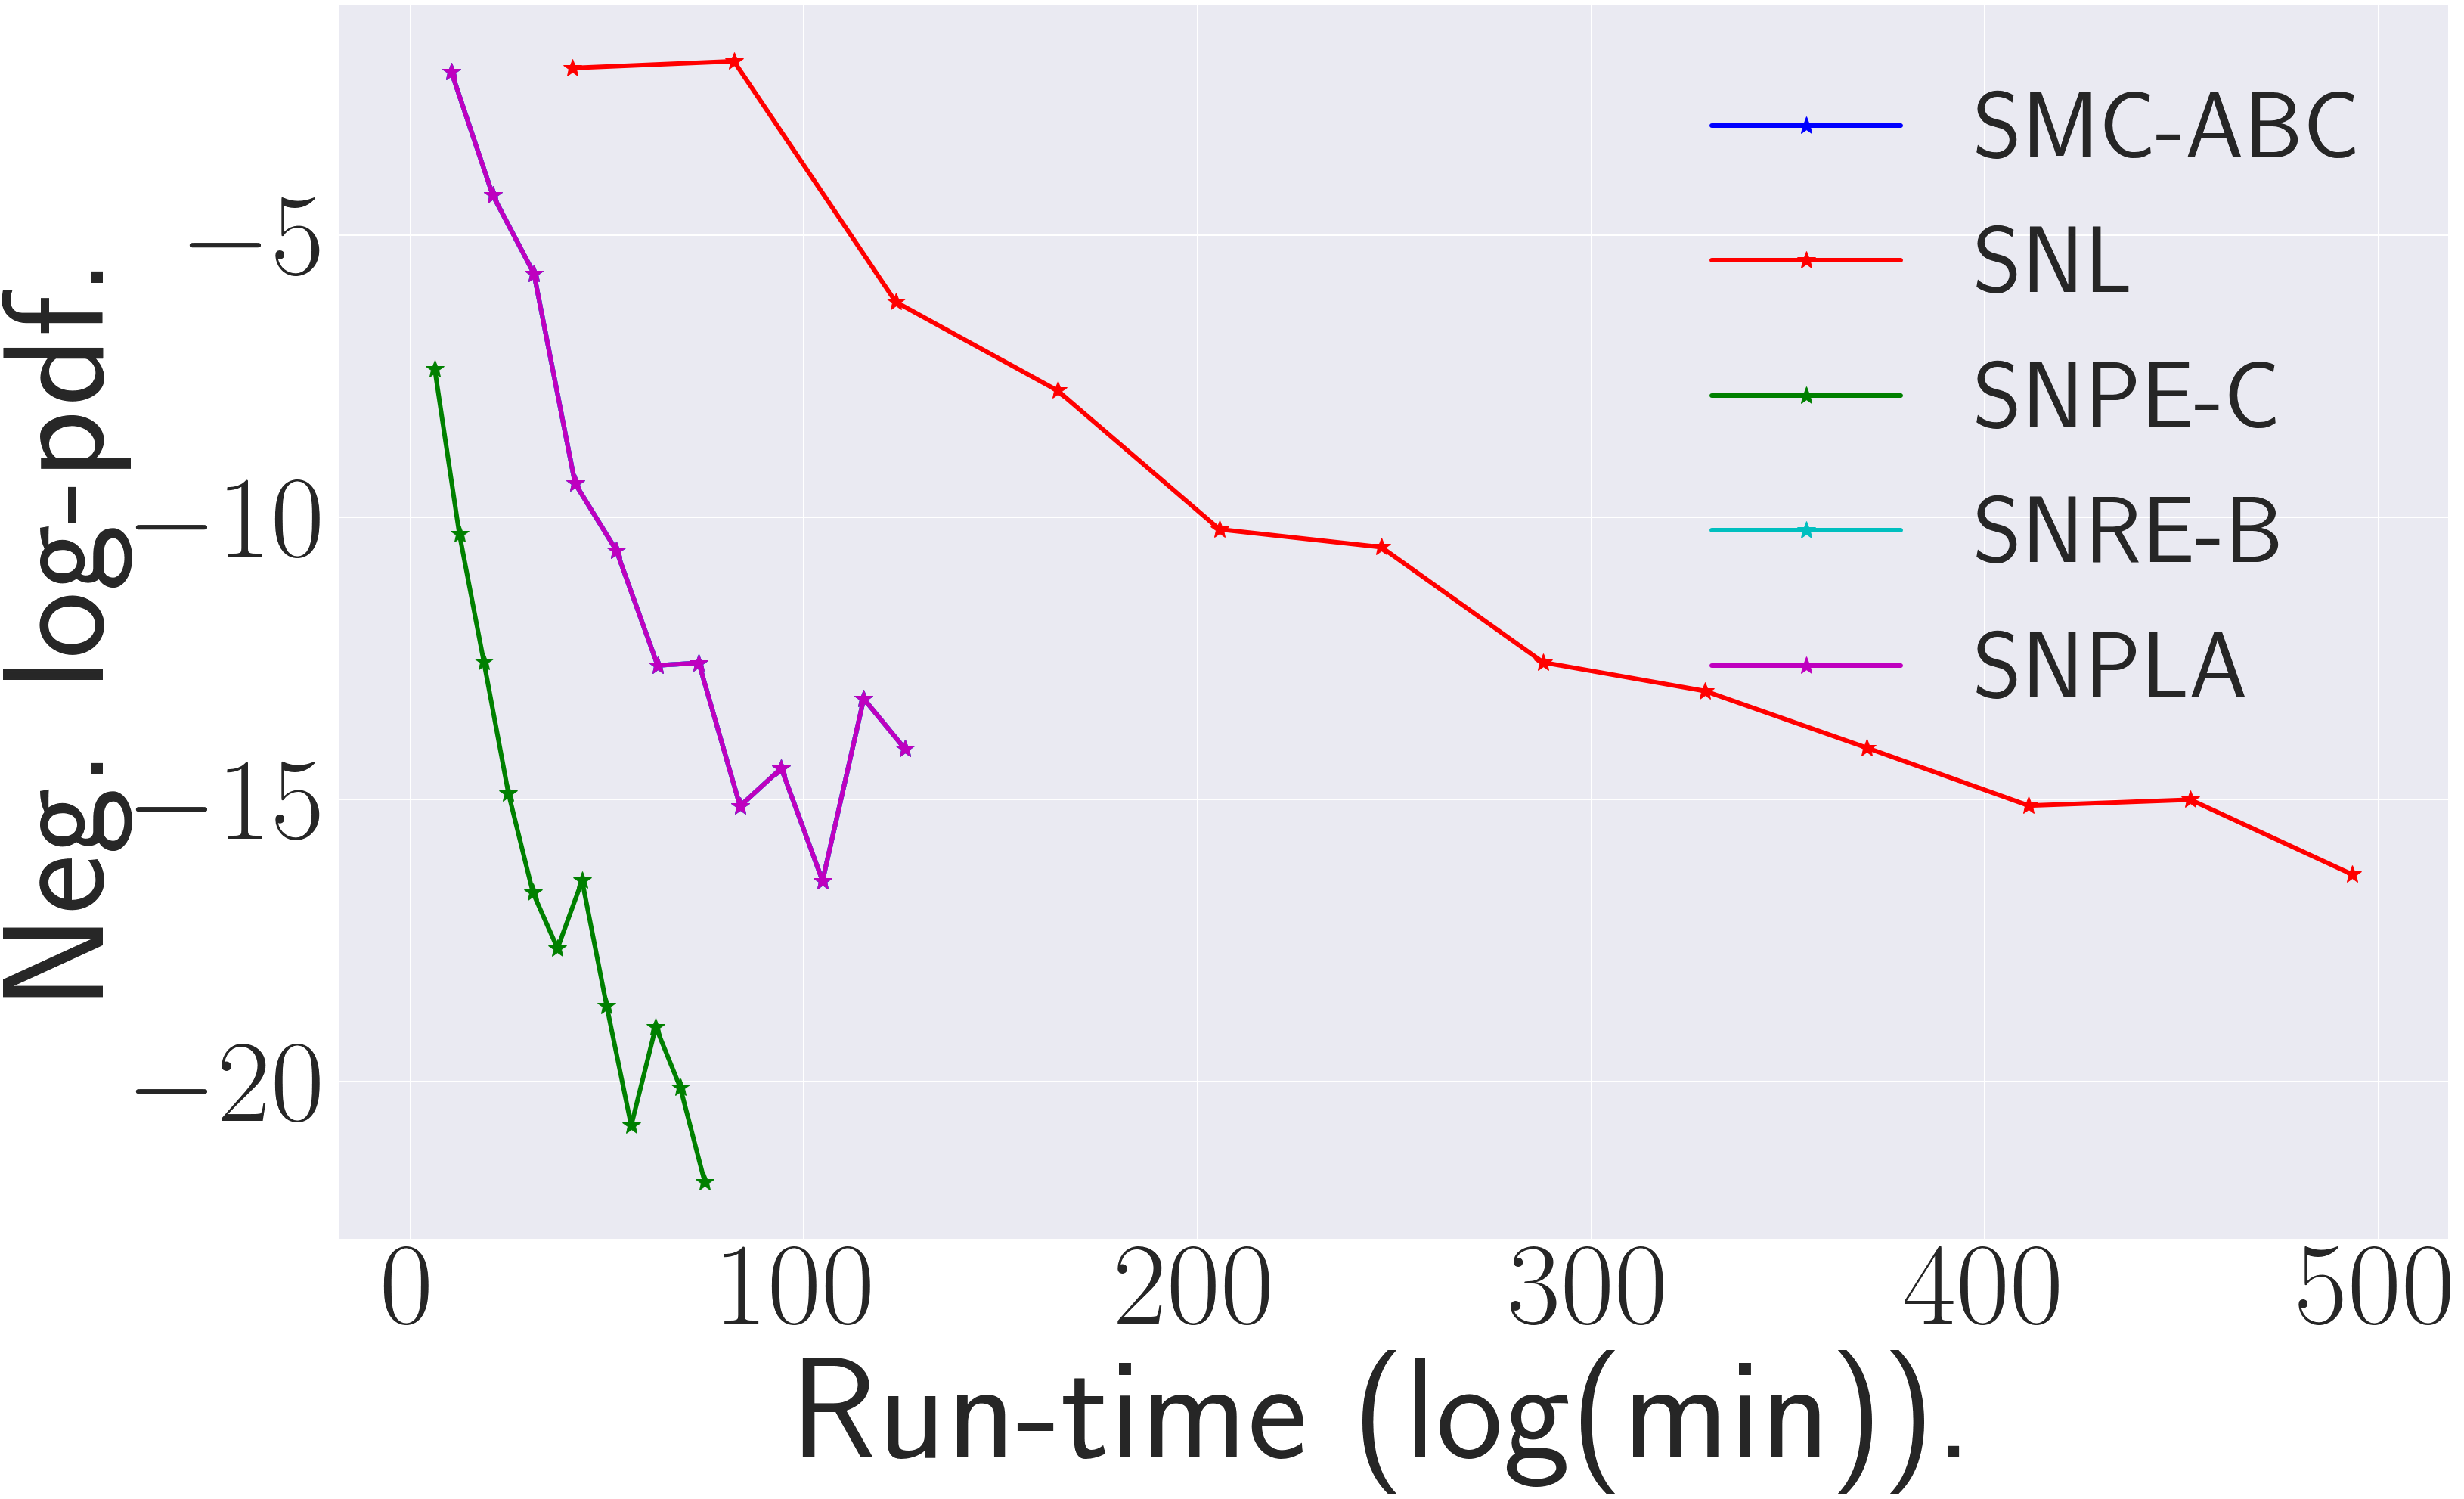

In [28]:
fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_snpla, log_prob_snpla, color = "b",
         label='SMC-ABC', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snl, log_prob_snl, color = "r",
         label='SNL', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpe_c, log_prob_snpe_c, color = "g",
         label='SNPE-C', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpla, log_prob_snpla, color = "c",
         label='SNRE-B', linewidth=6, marker = "*", markersize=25)

ax.plot(x_snpla, log_prob_snpla, color = "m",
         label='SNPLA', linewidth=6, marker = "*", markersize=25)

ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=155)
ax.tick_params(axis='both', which='minor', labelsize=150)
ax.legend(prop={'size': 125})
ax.set_ylabel("Neg. log-pdf.", fontsize=190)
ax.set_xlabel("Run-time (log(min)).", fontsize=190)
#ax.legend(prop={'size': 140}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale("linear")
plt.savefig("./fig/neg_log_pdf_posteriors.pdf", bbox_inches='tight')

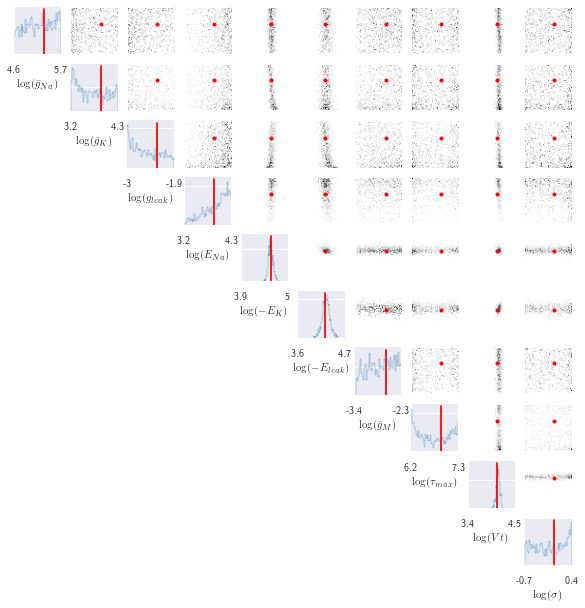

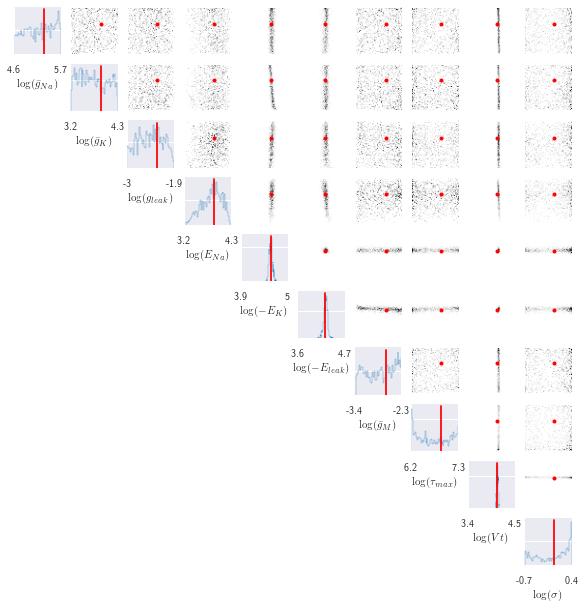

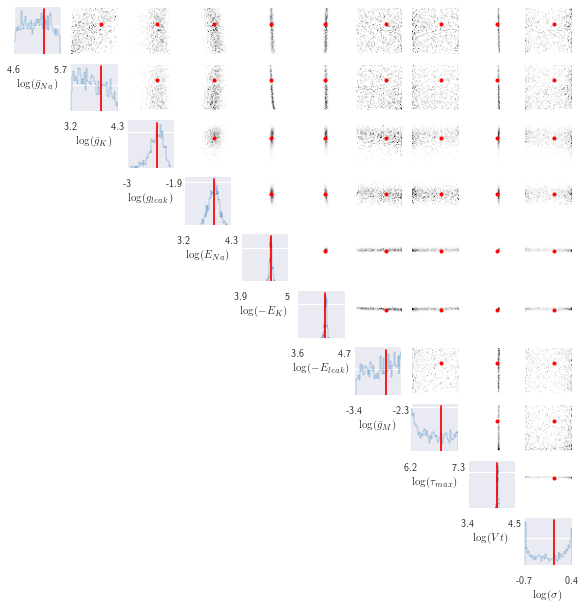

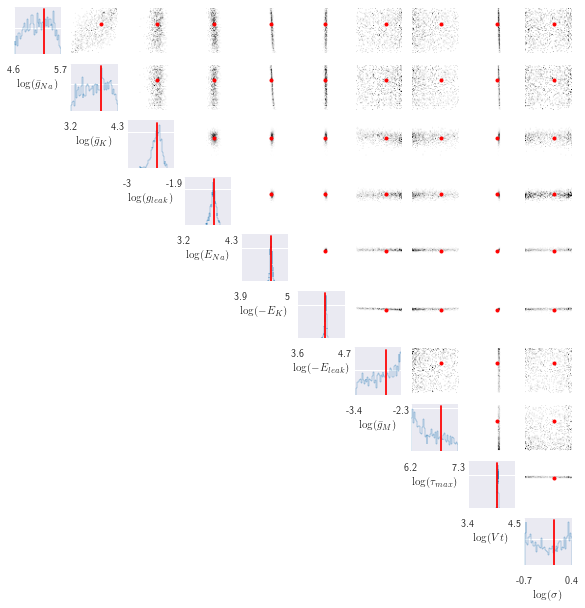

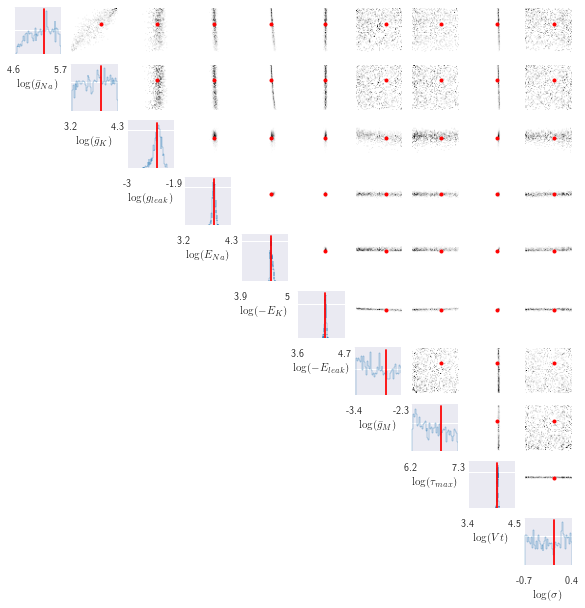

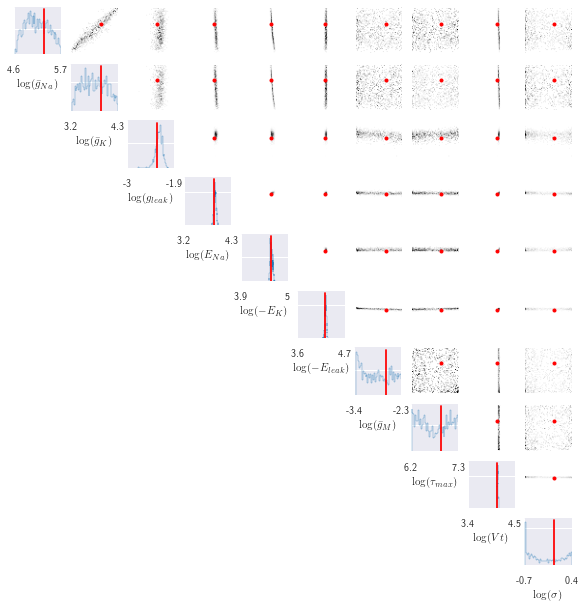

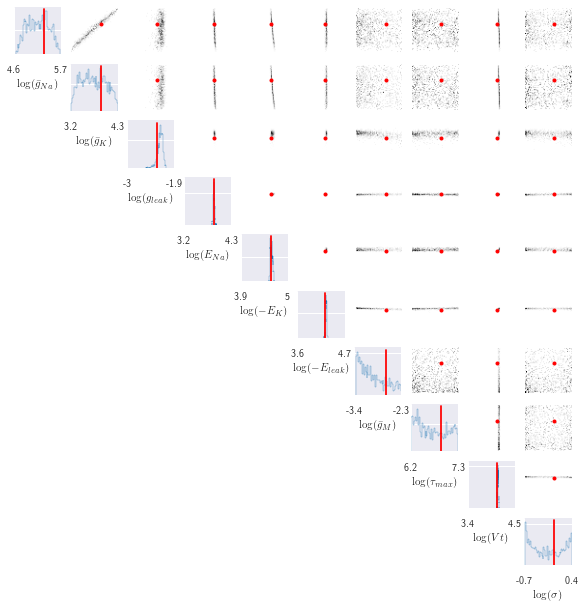

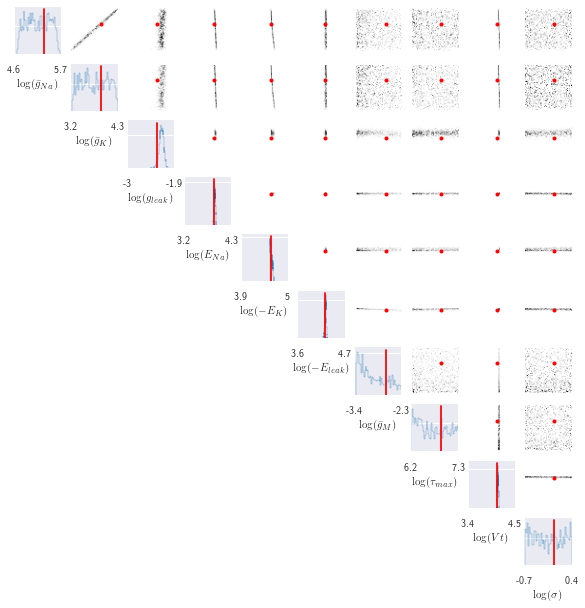

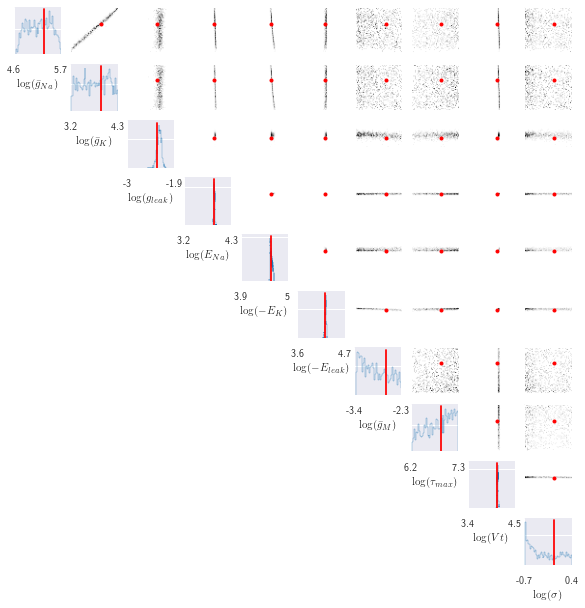

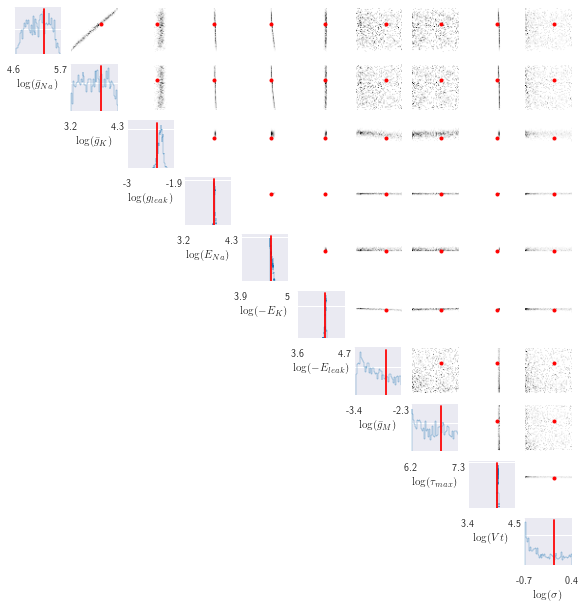

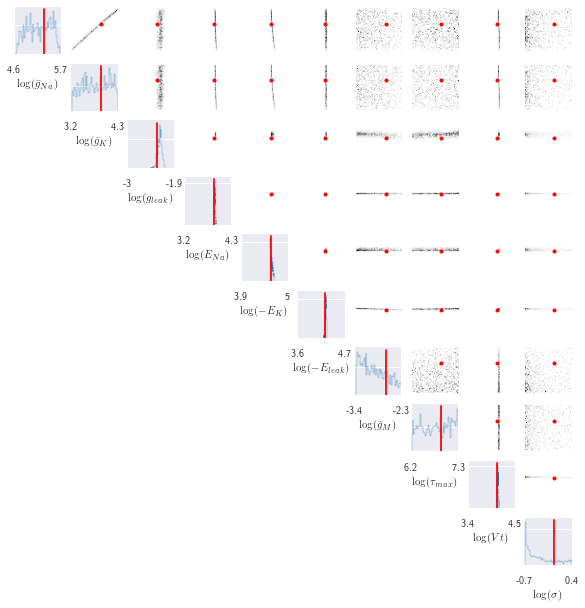

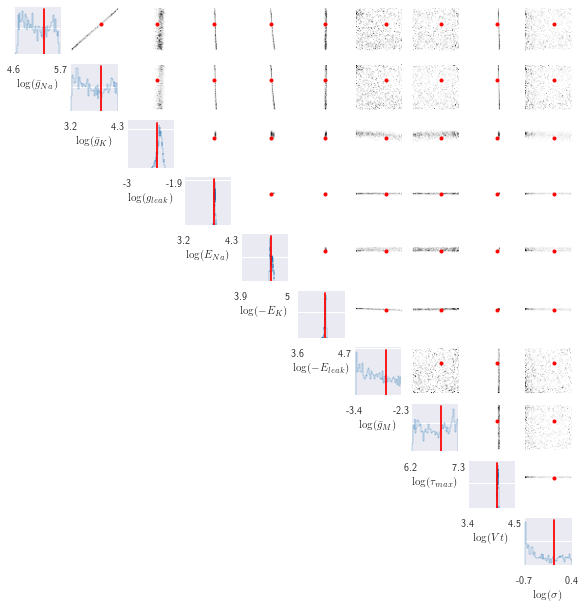

In [28]:
for i in range(nbr_rounds):
    fig, axes = utils.pairplot(snpe_c_post[i][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)

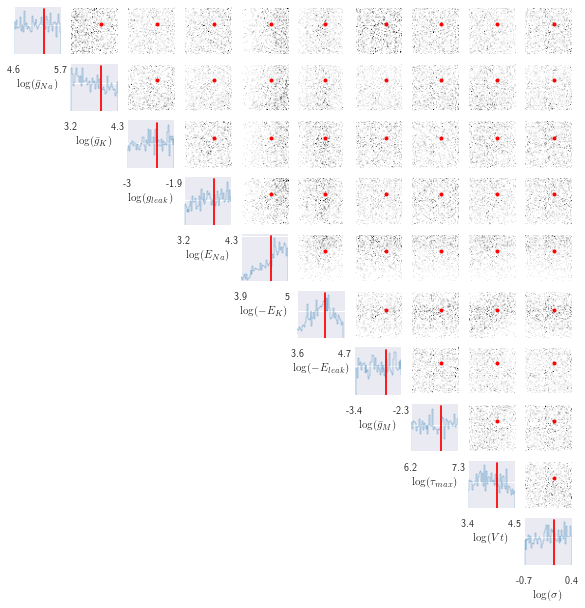

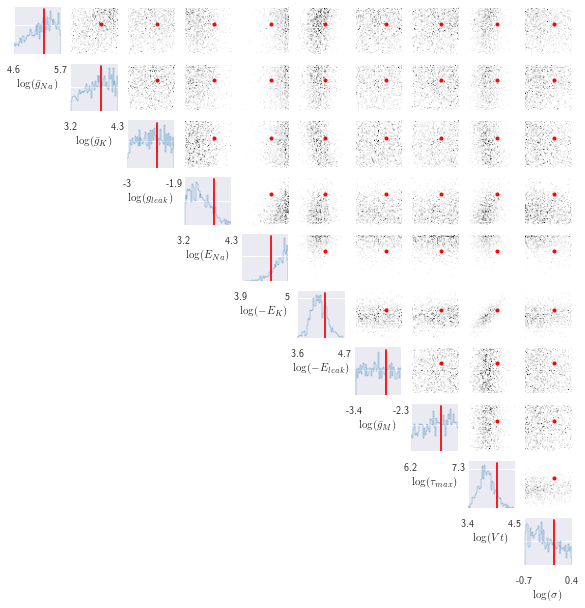

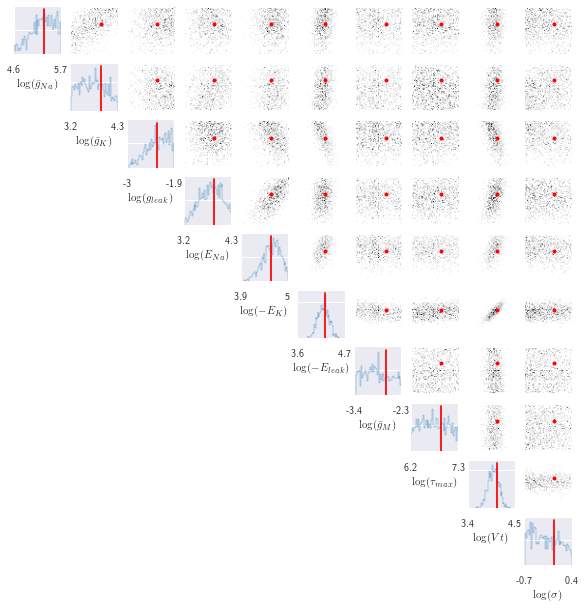

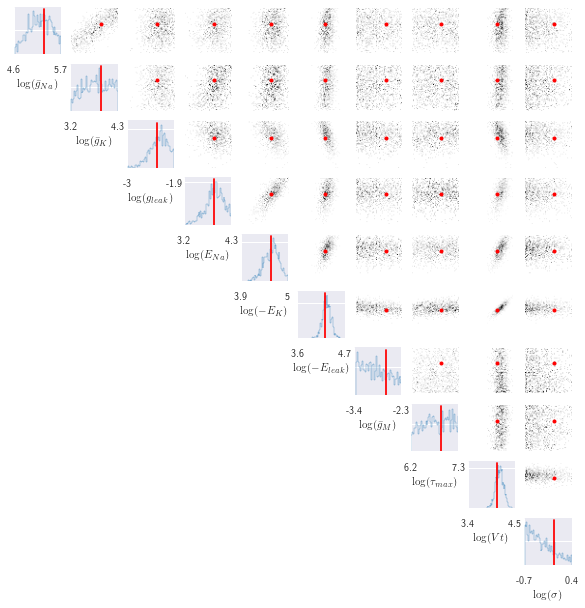

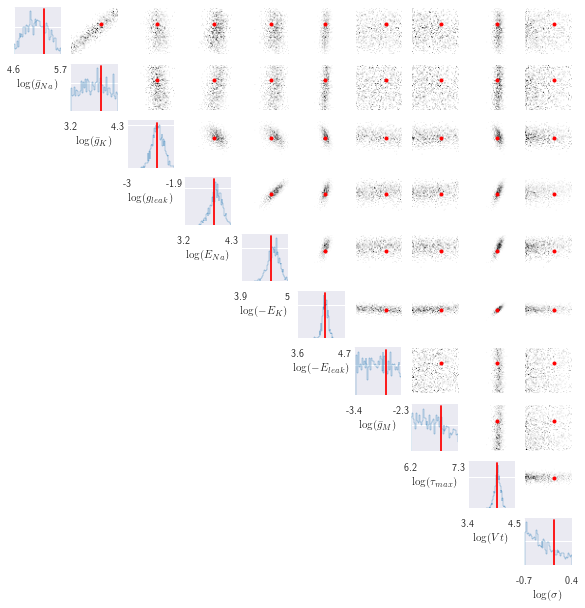

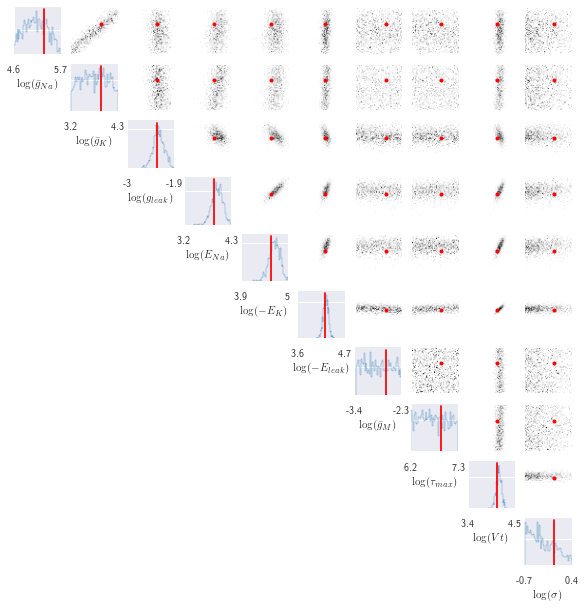

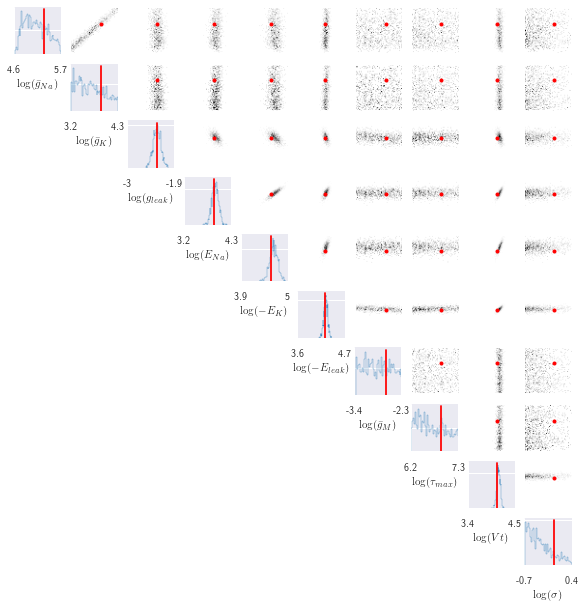

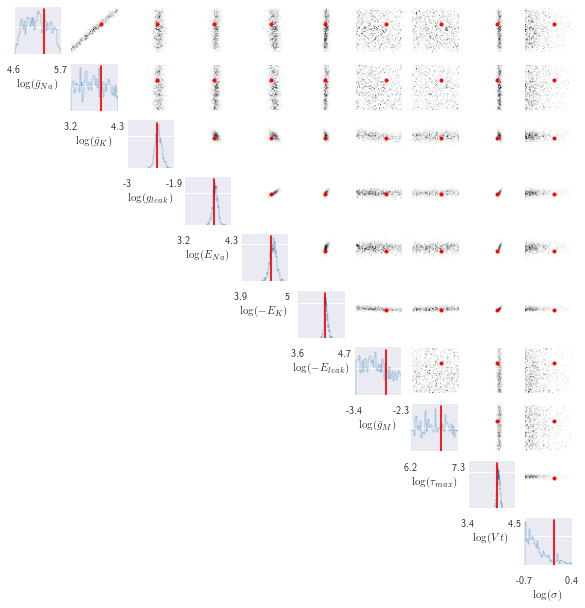

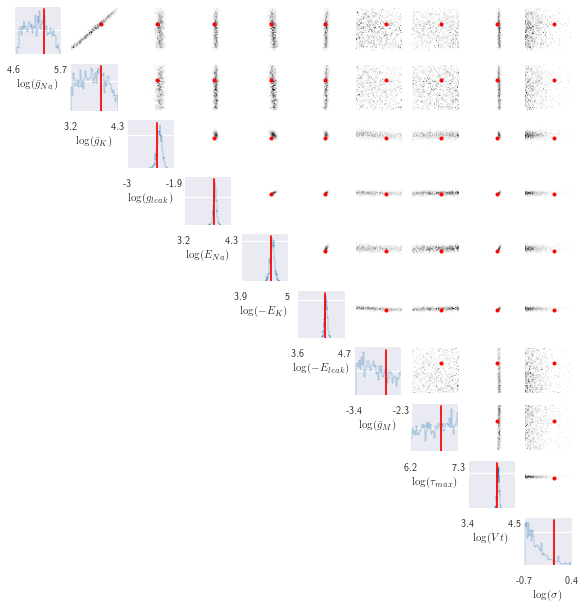

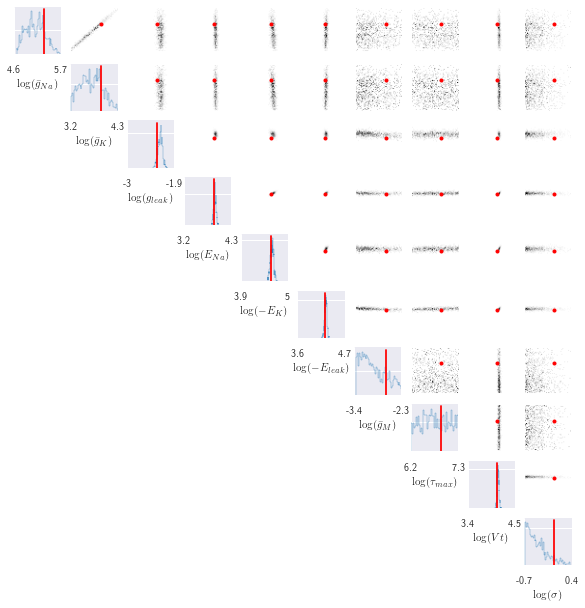

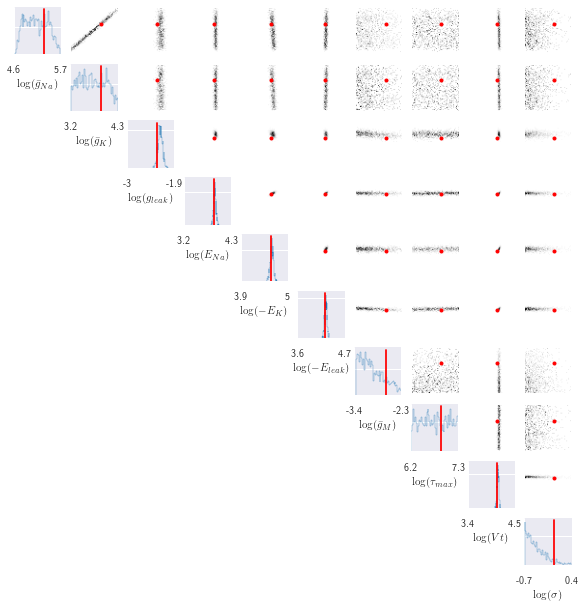

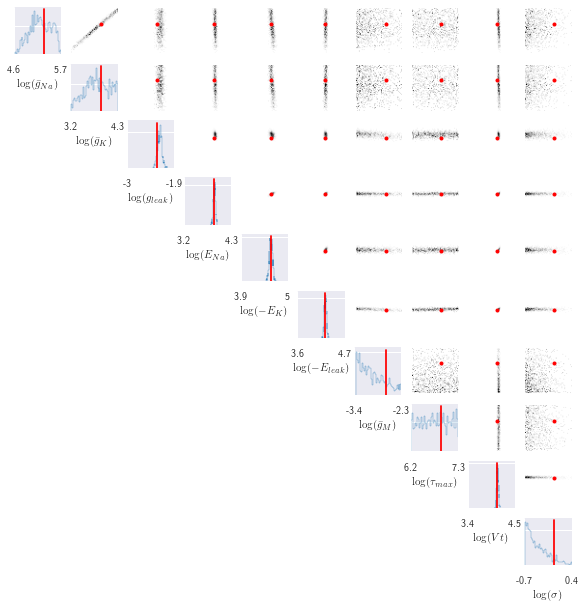

In [33]:
for i in range(nbr_rounds):
    fig, axes = utils.pairplot(snl_post[i][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)

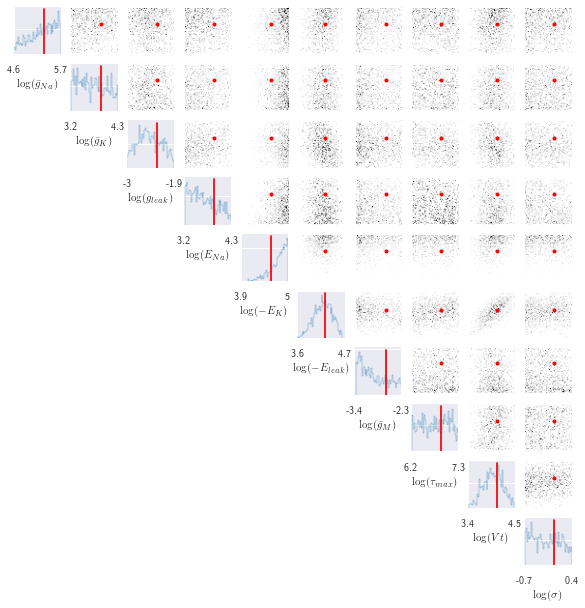

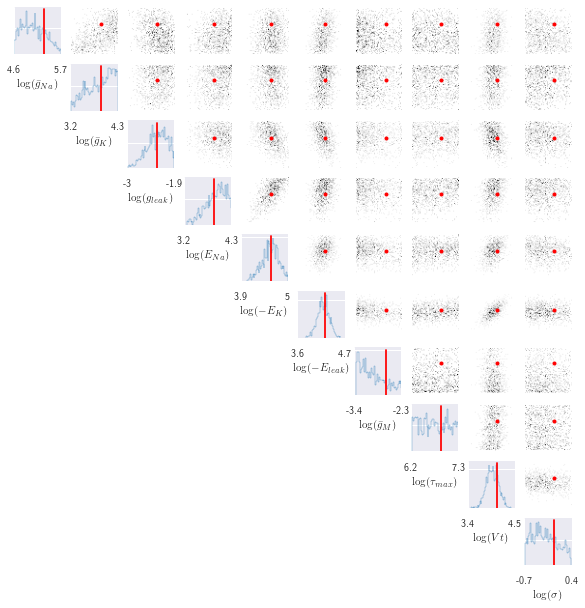

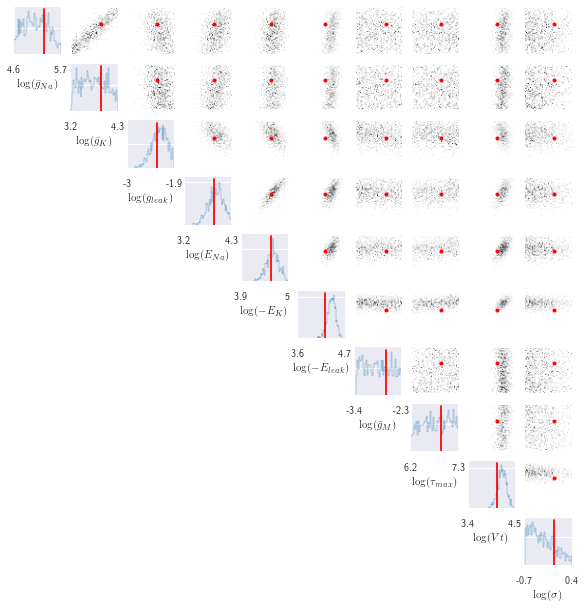

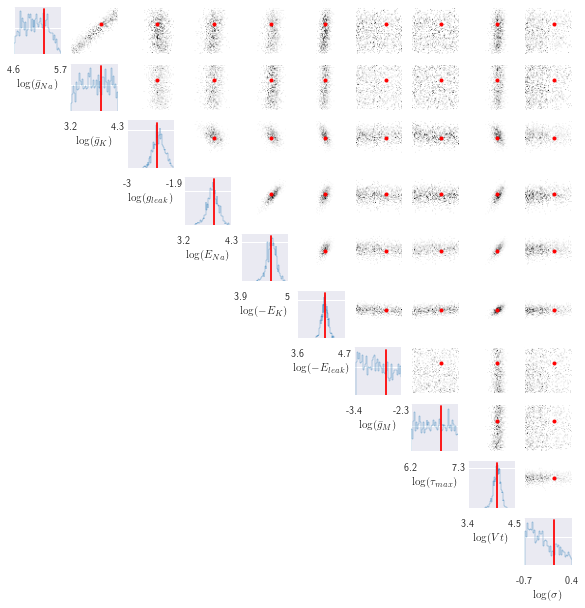

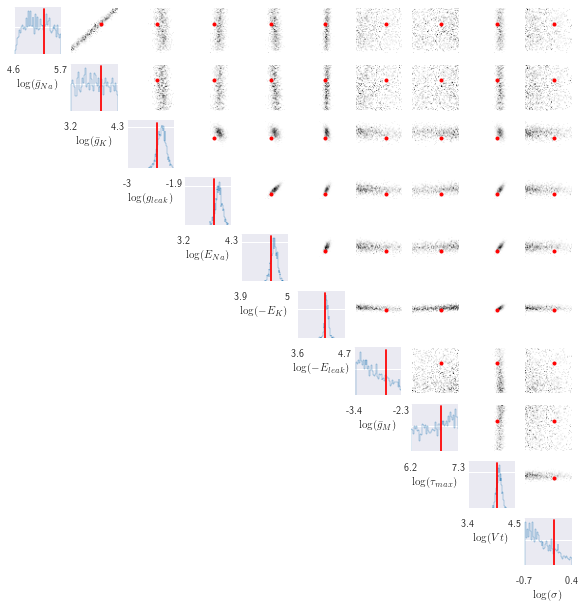

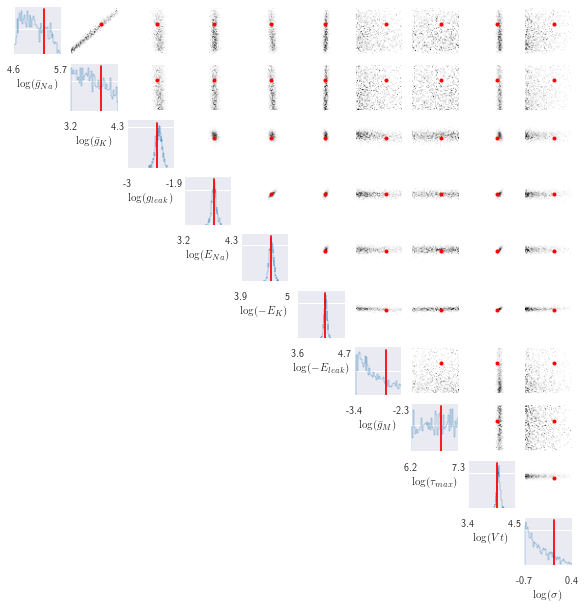

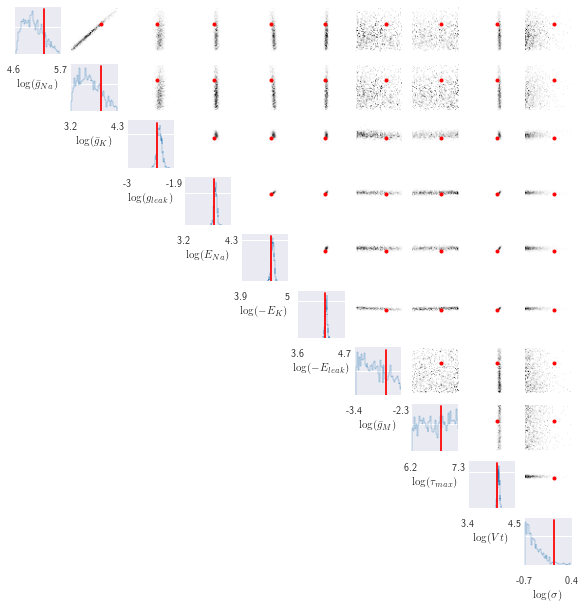

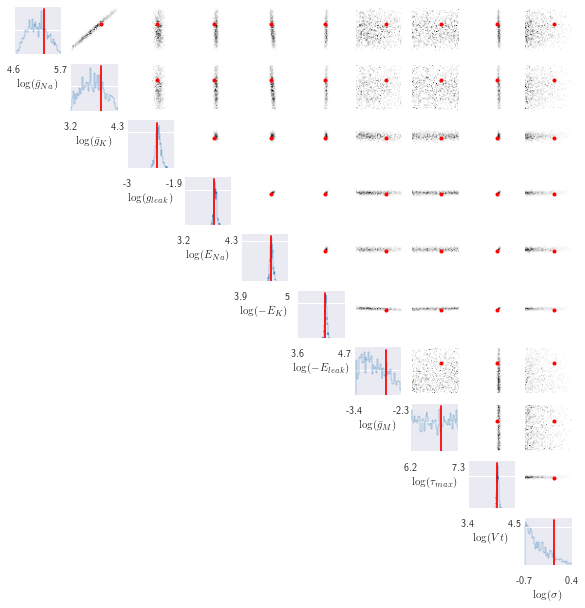

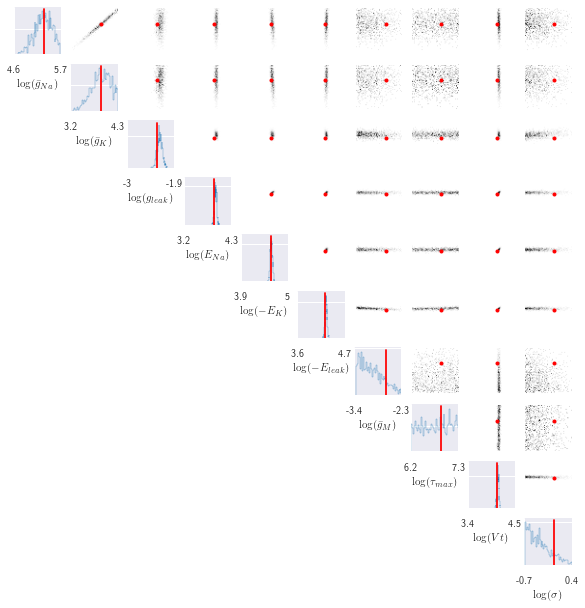

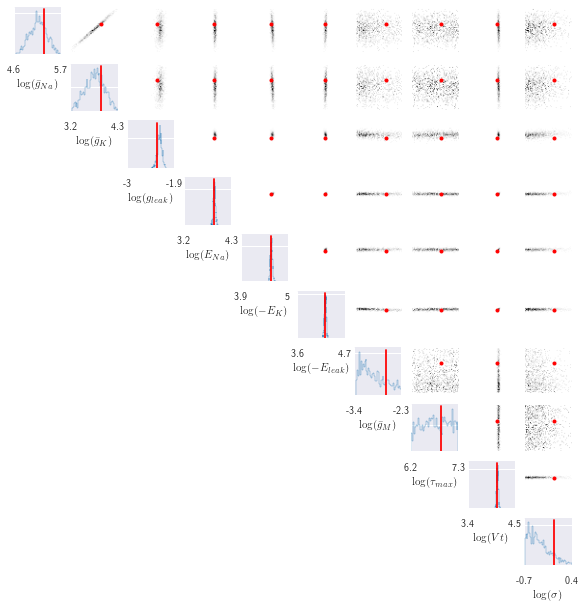

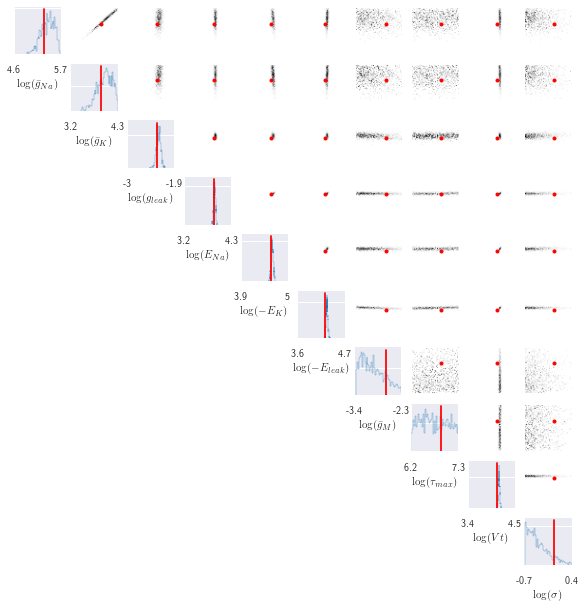

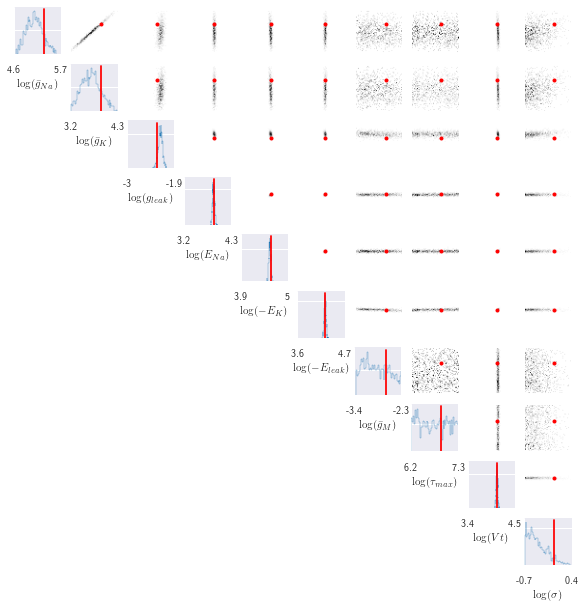

In [34]:
for i in range(nbr_rounds):
    fig, axes = utils.pairplot(snpla_post[i][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)

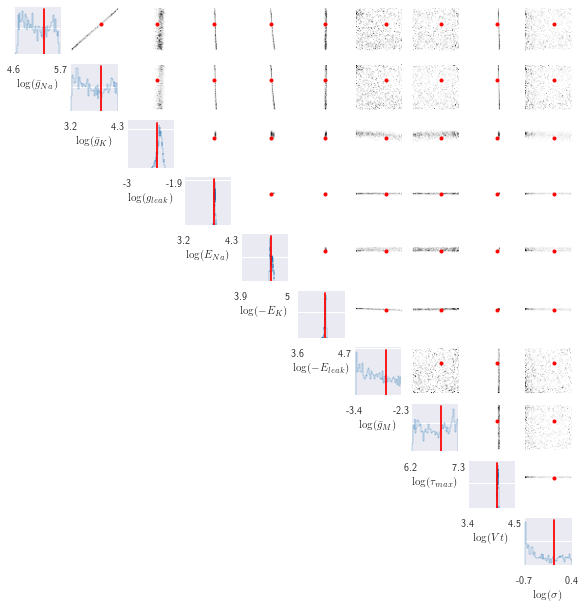

In [31]:
fig, axes = utils.pairplot(snpe_c_post[-1][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)
plt.savefig("./fig/post_samples_snpe_c.pdf", bbox_inches='tight')

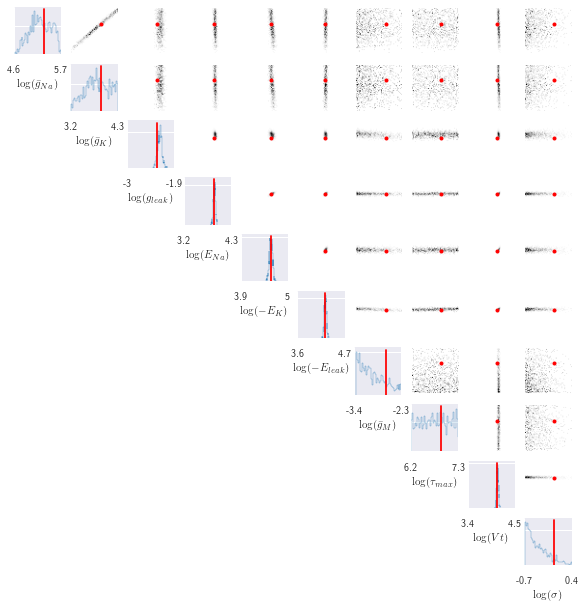

In [32]:
fig, axes = utils.pairplot(snl_post[-1][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                           labels = labels)
plt.savefig("./fig/post_samples_snl.pdf", bbox_inches='tight')


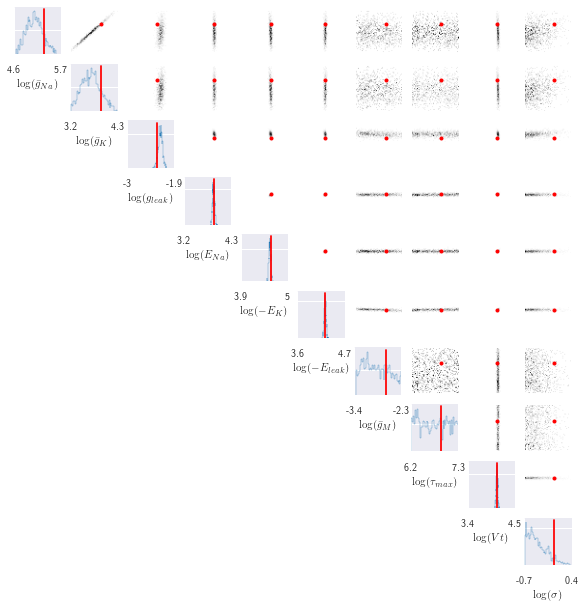

In [33]:
fig, axes = utils.pairplot(snpla_post[-1][0],
                           points=torch.as_tensor(model.log_theta_true),
                           points_offdiag={'markersize': 6},
                           points_colors='r',
                           limits=prior_limits,
                           ticks=prior_limits,
                          labels = labels)
plt.savefig("./fig/post_samples_snpla.pdf", bbox_inches='tight')


### Posterior pred sampels 

In [38]:
post_idx = random.sample(range(1, 100), 10)

v_path_snpe_c = []
v_path_snl = []
v_path_snpla = []

for idx in post_idx:
    v_path_snpe_c.append(model.simulator(snpe_c_post[-1][0][idx,:], seed_data))
    v_path_snl.append(model.simulator(snl_post[-1][0][idx,:], seed_data))
    v_path_snpla.append(model.simulator(snpla_post[-1][0][idx,:], seed_data))


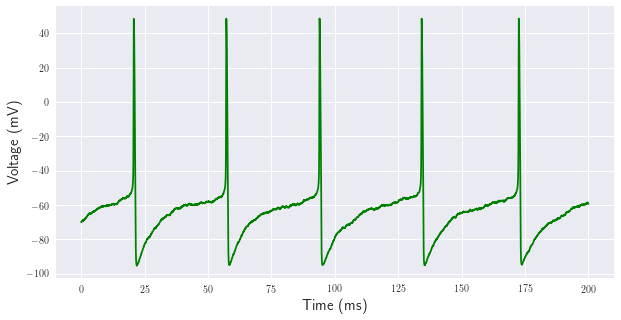

In [39]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_vec, v_true, color = "g")
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/simulated_data_set.pdf")

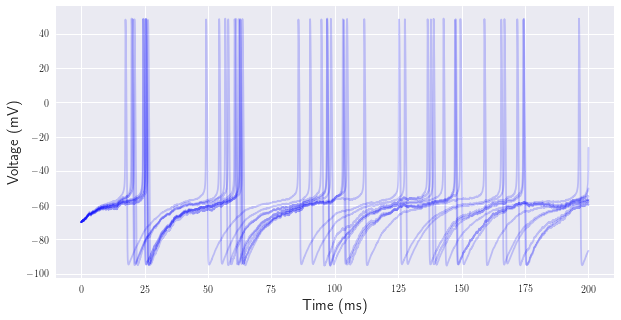

In [40]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
for p in v_path_snpe_c: 
    ax.plot(t_vec, p, color = "b", alpha=0.2)
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/posterior_pred_paths_snpe_c.pdf")

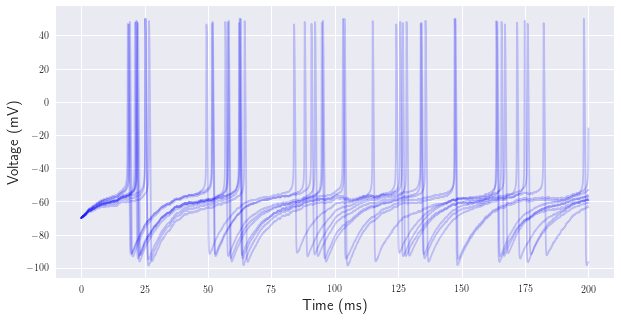

In [42]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
for p in v_path_snl: 
    ax.plot(t_vec, p, color = "b", alpha=0.2)
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/posterior_pred_paths_snl.pdf")

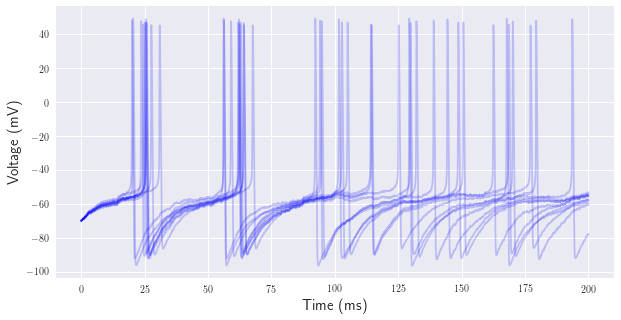

In [43]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
for p in v_path_snpla: 
    ax.plot(t_vec, p, color = "b", alpha=0.2)
ax.set_xlabel("Time (ms)", fontsize=15)
ax.set_ylabel("Voltage (mV)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.savefig("./fig/posterior_pred_paths_snpla.pdf")

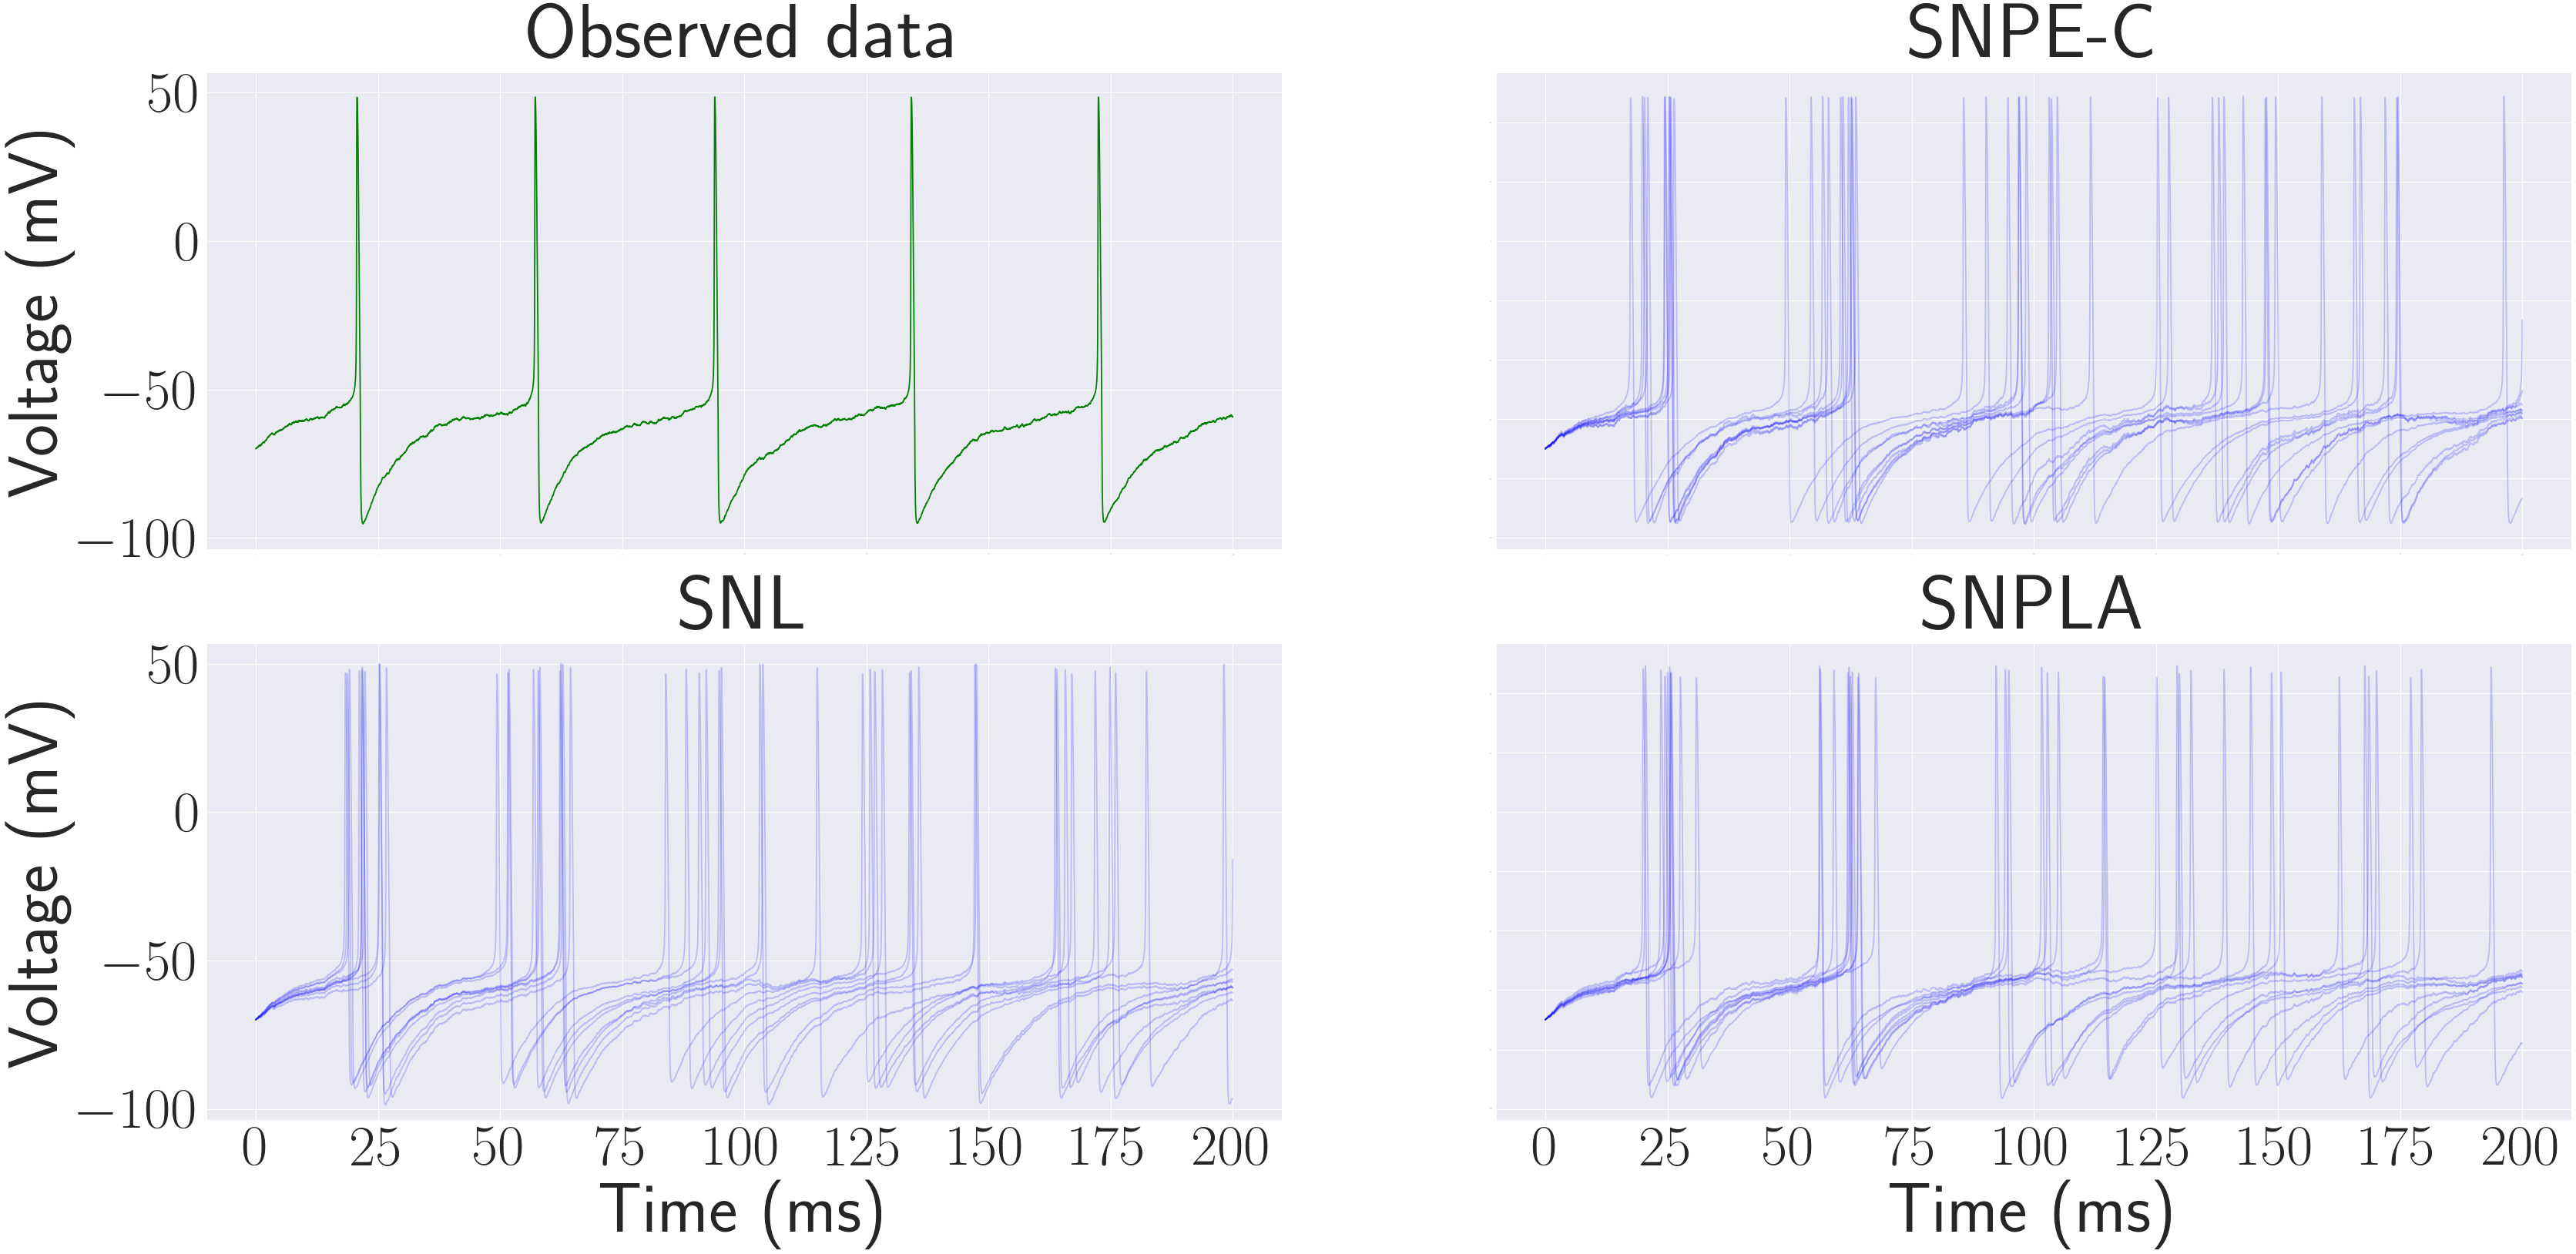

In [91]:
fig = plt.figure(figsize = (55,25))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1) # why arent the axis fixed
ax3 = fig.add_subplot(2, 2, 3, sharex=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharex=ax1)

ax1.plot(t_vec, v_true, color = "g")

for p in v_path_snpe_c: 
    ax2.plot(t_vec, p, color = "b", alpha=0.2)

for p in v_path_snl: 
    ax3.plot(t_vec, p, color = "b", alpha=0.2)

for p in v_path_snpla: 
    ax4.plot(t_vec, p, color = "b", alpha=0.2)

ax3.set_xlabel("Time (ms)", fontsize=90)
ax1.set_ylabel("Voltage (mV)", fontsize=90)
80
ax4.set_xlabel("Time (ms)", fontsize=90)
ax3.set_ylabel("Voltage (mV)", fontsize=90)

    
ax1.set_title("Observed data",fontsize=100)
ax2.set_title("SNPE-C",fontsize=100)
ax3.set_title("SNL",fontsize=100)
ax4.set_title("SNPLA",fontsize=100)

for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', labelsize=75)
    ax.tick_params(axis='both', which='minor', labelsize=70)
    ax.set_xlim(ax1.get_xlim())
    ax.set_ylim(ax4.get_ylim())
    
for ax in [ax1, ax2]: 

    
    #ax.tick_params(axis='y', which='major', labelsize=0)
    #ax.tick_params(axis='y', which='minor', labelsize=0)

    ax.tick_params(axis='x', which='major', labelsize=0)
    ax.tick_params(axis='x', which='minor', labelsize=0)

for ax in [ax2, ax4]: 

    
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.tick_params(axis='y', which='minor', labelsize=0)

    #ax.tick_params(axis='x', which='major', labelsize=0)
    #ax.tick_params(axis='x', which='minor', labelsize=0)

    
    
plt.savefig("./fig/posterior_pred_paths.pdf", bbox_inches='tight')

# Quantile intervals for res inference 

In [35]:
print(np.round(model.log_theta_true,3))

[ 5.298  3.912 -2.303  3.912  4.605  4.248 -2.659  6.908  4.094  0.   ]


In [36]:
print(np.round(np.quantile(snpe_c_post[-1][0], 0.25, axis = 0),3))
print(np.round(np.median(snpe_c_post[-1][0],axis = 0),3))
print(np.round(np.quantile(snpe_c_post[-1][0], 0.75, axis = 0),3))


[ 4.863  3.454 -2.346  3.895  4.599  4.242 -2.946  6.506  4.095 -0.516]
[ 5.11   3.698 -2.302  3.913  4.62   4.25  -2.685  6.814  4.104 -0.257]
[ 5.361  4.019 -2.261  3.929  4.644  4.257 -2.478  7.107  4.112  0.118]


In [37]:
for i in range(nbr_params):
    
    s_temp_1 = str(np.round(np.median(snpe_c_post[-1][0],axis = 0),3)[i]) 
    s_temp_2 = ", ("
    s_temp_3 = str(np.round(np.quantile(snpe_c_post[-1][0], 0.25, axis = 0),3)[i])
    s_temp_4 = ", "
    s_temp_5 = str(np.round(np.quantile(snpe_c_post[-1][0], 0.75, axis = 0),3)[i])
    s_temp_6 = ")"
    
    s_temp = s_temp_1 + s_temp_2 + s_temp_3 + s_temp_4 + s_temp_5 + s_temp_6
    print(s_temp)


5.11, (4.863, 5.361)
3.698, (3.454, 4.019)
-2.302, (-2.346, -2.261)
3.913, (3.895, 3.929)
4.62, (4.599, 4.644)
4.25, (4.242, 4.257)
-2.685, (-2.946, -2.478)
6.814, (6.506, 7.107)
4.104, (4.095, 4.112)
-0.257, (-0.516, 0.118)


In [38]:
print(np.round(np.quantile(snl_post[-1][0], 0.25, axis = 0),3))
print(np.round(np.median(snl_post[-1][0],axis = 0),3))
print(np.round(np.quantile(snl_post[-1][0], 0.75, axis = 0),3))


[ 4.982  3.54  -2.363  3.875  4.575  4.243 -3.098  6.539  4.085 -0.54 ]
[ 5.212  3.81  -2.3    3.912  4.62   4.271 -2.876  6.839  4.109 -0.344]
[ 5.429  4.055 -2.231  3.954  4.662  4.298 -2.637  7.091  4.135 -0.108]


In [39]:
for i in range(nbr_params):
    
    s_temp_1 = str(np.round(np.median(snl_post[-1][0],axis = 0),3)[i]) 
    s_temp_2 = ", ("
    s_temp_3 = str(np.round(np.quantile(snl_post[-1][0], 0.25, axis = 0),3)[i])
    s_temp_4 = ", "
    s_temp_5 = str(np.round(np.quantile(snl_post[-1][0], 0.75, axis = 0),3)[i])
    s_temp_6 = ")"
    
    s_temp = s_temp_1 + s_temp_2 + s_temp_3 + s_temp_4 + s_temp_5 + s_temp_6
    print(s_temp)

5.212, (4.982, 5.429)
3.81, (3.54, 4.055)
-2.3, (-2.363, -2.231)
3.912, (3.875, 3.954)
4.62, (4.575, 4.662)
4.271, (4.243, 4.298)
-2.876, (-3.098, -2.637)
6.839, (6.539, 7.091)
4.109, (4.085, 4.135)
-0.344, (-0.54, -0.108)


In [40]:
print(np.round(np.quantile(snpla_post[-1][0], 0.25, axis = 0),3))
print(np.round(np.median(snpla_post[-1][0],axis = 0),3))
print(np.round(np.quantile(snpla_post[-1][0], 0.75, axis = 0),3))


[ 5.098  3.666 -2.518  4.016  4.756  4.325 -3.161  6.71   4.186 -0.501]
[ 5.29   3.89  -2.439  4.098  4.848  4.38  -2.933  6.969  4.233 -0.296]
[ 5.47   4.098 -2.349  4.172  4.92   4.426 -2.645  7.154  4.28  -0.02 ]


In [41]:
for i in range(nbr_params):
    
    s_temp_1 = str(np.round(np.median(snpla_post[-1][0],axis = 0),3)[i]) 
    s_temp_2 = ", ("
    s_temp_3 = str(np.round(np.quantile(snpla_post[-1][0], 0.25, axis = 0),3)[i])
    s_temp_4 = ", "
    s_temp_5 = str(np.round(np.quantile(snpla_post[-1][0], 0.75, axis = 0),3)[i])
    s_temp_6 = ")"
    
    s_temp = s_temp_1 + s_temp_2 + s_temp_3 + s_temp_4 + s_temp_5 + s_temp_6
    print(s_temp)

5.29, (5.098, 5.47)
3.89, (3.666, 4.098)
-2.439, (-2.518, -2.349)
4.098, (4.016, 4.172)
4.848, (4.756, 4.92)
4.38, (4.325, 4.426)
-2.933, (-3.161, -2.645)
6.969, (6.71, 7.154)
4.233, (4.186, 4.28)
-0.296, (-0.501, -0.02)


In [42]:
np.round(model.log_theta_true,3)


array([ 5.298,  3.912, -2.303,  3.912,  4.605,  4.248, -2.659,  6.908,
        4.094,  0.   ])